<h1 align="center" style="font-variant: small-caps;"> Machine Learning Term Project

<h3 align="center" style="font-variant: small-caps;"> Sept-Nov'24

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-mental-health/music-and-mental-health.csv


<h1 align="center" style="font-variant: small-caps;"> Rhythms of the Mind: Music as Therapy for Mental Well-being
<h3 align="center" style="font-variant: small-caps;"> Term Project Jul-Dec'24

<h2 align="center" style="font-variant: small-caps;"> Team Name: Bhattacharya Brothers
<h2 align="center" style="font-variant: small-caps;"> Name and ID of Member 1: Soham Bhattacharya B2430059
<h2 align="center" style="font-variant: small-caps;"> Name and ID of Member 2: Darpan Bhattacharya B2430044

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Context of the problem
### Based on the music tastes and lifestyle of the person, does music improve/worsen respondent's mental health conditions? <br> Target variable : Music Effects

# Load the Dataset

In [3]:
# Loading a particular dataset
dataset = pd.read_csv('/kaggle/input/music-mental-health/music-and-mental-health.csv')

# Display the first few rows of the dataset
dataset.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
# Checking the dimension of the dataset

dataset.shape

(736, 33)

# Exploratory Data Analysis (EDA)

## Descriptive Statistics
Understanding the distribution of the data

In [5]:
# Checking for columns that are categorical features
dataset.select_dtypes(include=['object']).columns

Index(['Timestamp', 'Primary streaming service', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects',
       'Permissions'],
      dtype='object')

In [6]:
# Checking for columns that are numerical features
dataset.select_dtypes(include=['number']).columns

Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [8]:
# Viewing the summary of numerical attributes

dataset.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [9]:
# Viewing the summary of categorical attributes

dataset.describe(include=['object'], exclude=['number'])

,Timestamp,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Permissions
count,736,735,733,732,735,736,736,732,736,736,...,736,736,736,736,736,736,736,736,728,736
unique,735,6,2,2,2,16,2,2,4,4,...,4,4,4,4,4,4,4,4,3,1
top,8/28/2022 16:15:08,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,...,Never,Never,Never,Very frequently,Never,Rarely,Very frequently,Never,Improve,I understand.
freq,2,458,579,497,609,188,525,404,259,343,...,443,280,264,277,225,215,330,236,542,736


## Data Visualization
Histograms and bar charts or pie charts for categorical features.<br>
Box plots or scatter plots for continuous features.

### Feature: AGE

In [10]:
dataset.Age.describe()

count    735.000000
mean      25.206803
std       12.054970
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       89.000000
Name: Age, dtype: float64

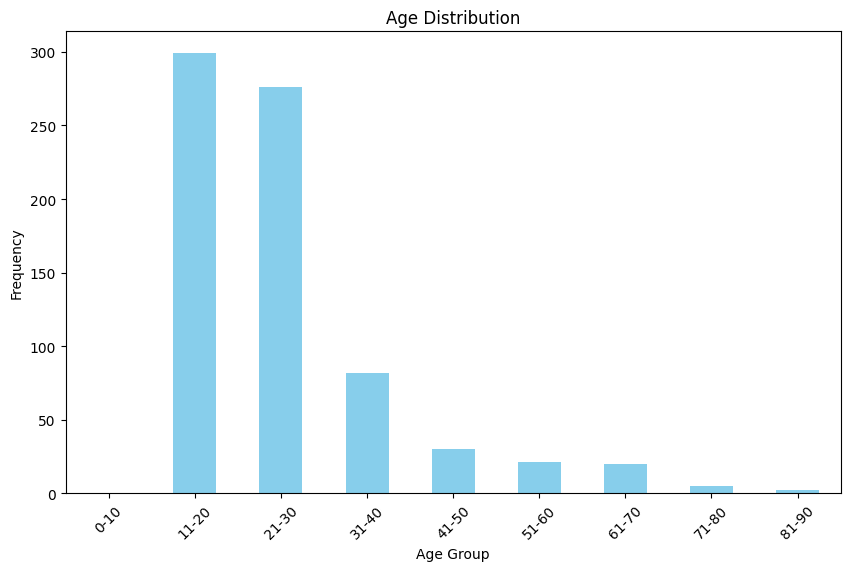

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Define bins for age categories
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create a new column 'age_group' with the corresponding age bins
age_group = pd.cut(dataset.Age, bins=bins, labels=labels, right=False)

# Count the number of occurrences in each bin
age_counts = age_group.value_counts().sort_index()

# Plot the barplot
plt.figure(figsize=(10,6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Feature: PRIMARY STREAMING SERVICE

In [12]:
dataset['Primary streaming service'].value_counts()

Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64

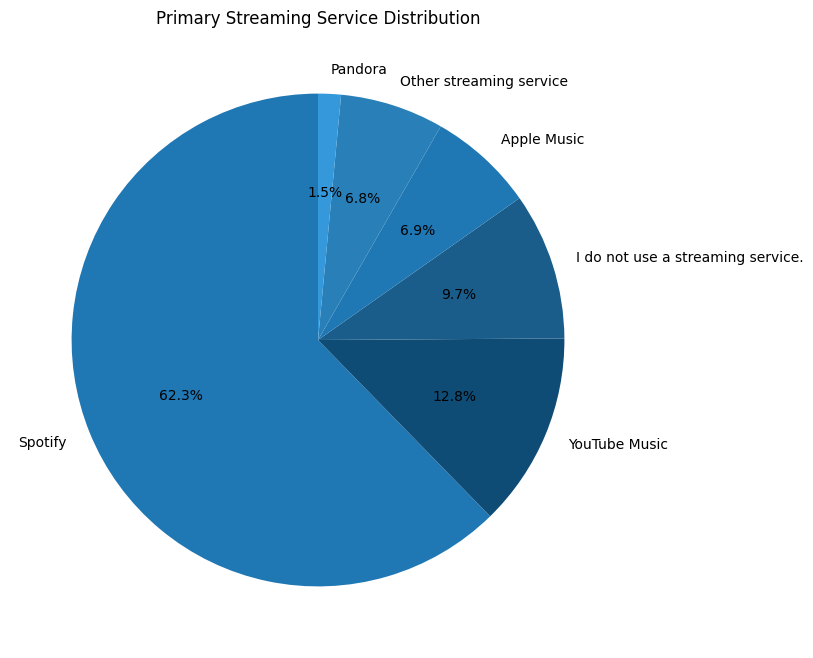

In [13]:
import matplotlib.pyplot as plt


# Define a color palette with shades of blue
base_color = "#1f77b4"  # Base color (blue)
colors = [
    base_color,
    "#0f4c75",  # Dark blue (base shade)
    "#1a5d8b",
    "#1f77b4",  # Base blue
    "#2980b9",
    "#3498db",
    "#5fa3d1",
    "#7bb8e1",
    "#99c3e7",
    "#b3d0ed",  # Lighter blue
    "#d0e4f1"   # Very light blue
]
# Plot the pie chart
plt.figure(figsize=(8, 8))
dataset['Primary streaming service'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Primary Streaming Service Distribution')
plt.ylabel('')  # Hide the ylabel (it's not necessary for a pie chart)
plt.show()

### Feature: NUMBER OF HOURS PER DAY

In [14]:
dataset['Hours per day'].describe()

count    736.000000
mean       3.572758
std        3.028199
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       24.000000
Name: Hours per day, dtype: float64

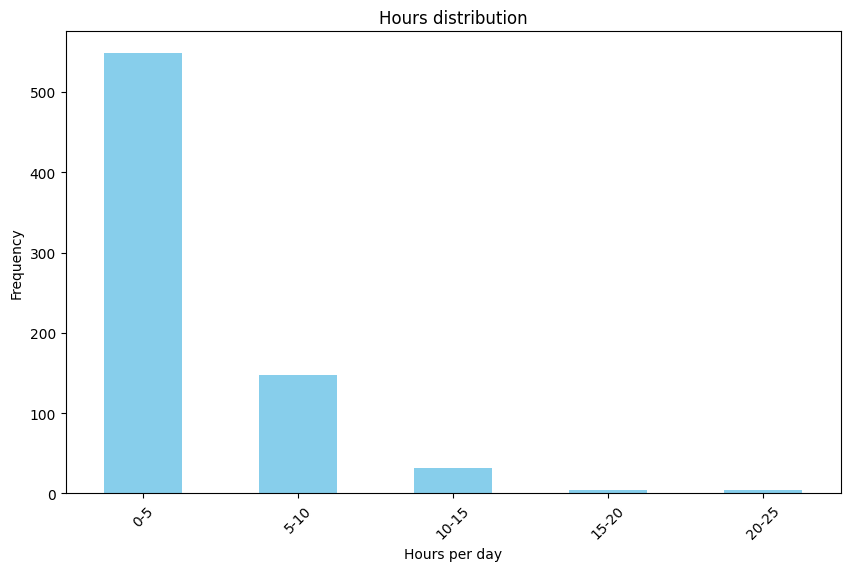

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Define bins for age categories
bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25']

# Create a new column 'group' with the corresponding bins
group = pd.cut(dataset['Hours per day'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each bin
counts = group.value_counts().sort_index()

# Plot the barplot
plt.figure(figsize=(10,6))
counts.plot(kind='bar', color='skyblue')
plt.title('Hours distribution')
plt.xlabel('Hours per day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Feature: Listening to music WHILE WORKING

In [16]:
dataset['While working'].value_counts()

While working
Yes    579
No     154
Name: count, dtype: int64

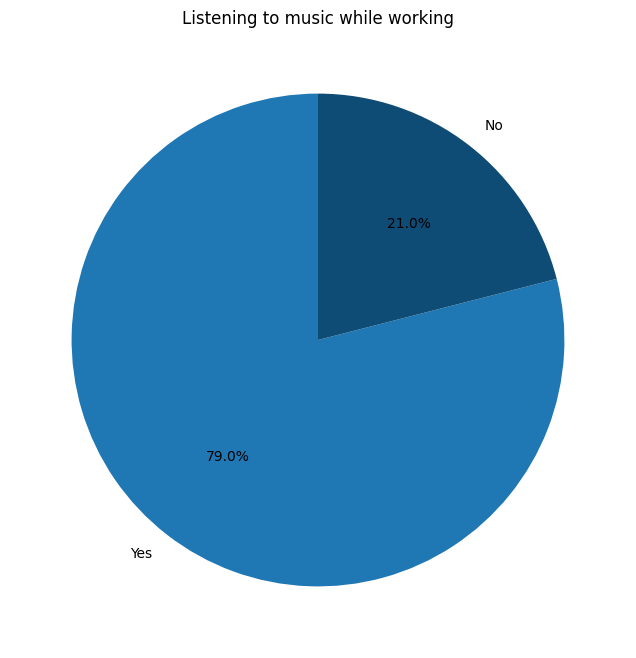

In [17]:
import matplotlib.pyplot as plt


# Define a color palette with shades of blue
base_color = "#1f77b4"  # Base color (blue)
colors = [
    base_color,
    "#0f4c75",  # Dark blue (base shade)
    "#1a5d8b",
    "#1f77b4",  # Base blue
    "#2980b9",
    "#3498db",
    "#5fa3d1",
    "#7bb8e1",
    "#99c3e7",
    "#b3d0ed",  # Lighter blue
    "#d0e4f1"   # Very light blue
]
# Plot the pie chart
plt.figure(figsize=(8, 8))
dataset['While working'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Listening to music while working')
plt.ylabel('')  # Hide the ylabel (it's not necessary for a pie chart)
plt.show()

### Features: INSTRUMENTALIST and COMPOSER

In [18]:
dataset.Instrumentalist.value_counts()

Instrumentalist
No     497
Yes    235
Name: count, dtype: int64

In [19]:
dataset.Composer.value_counts()

Composer
No     609
Yes    126
Name: count, dtype: int64

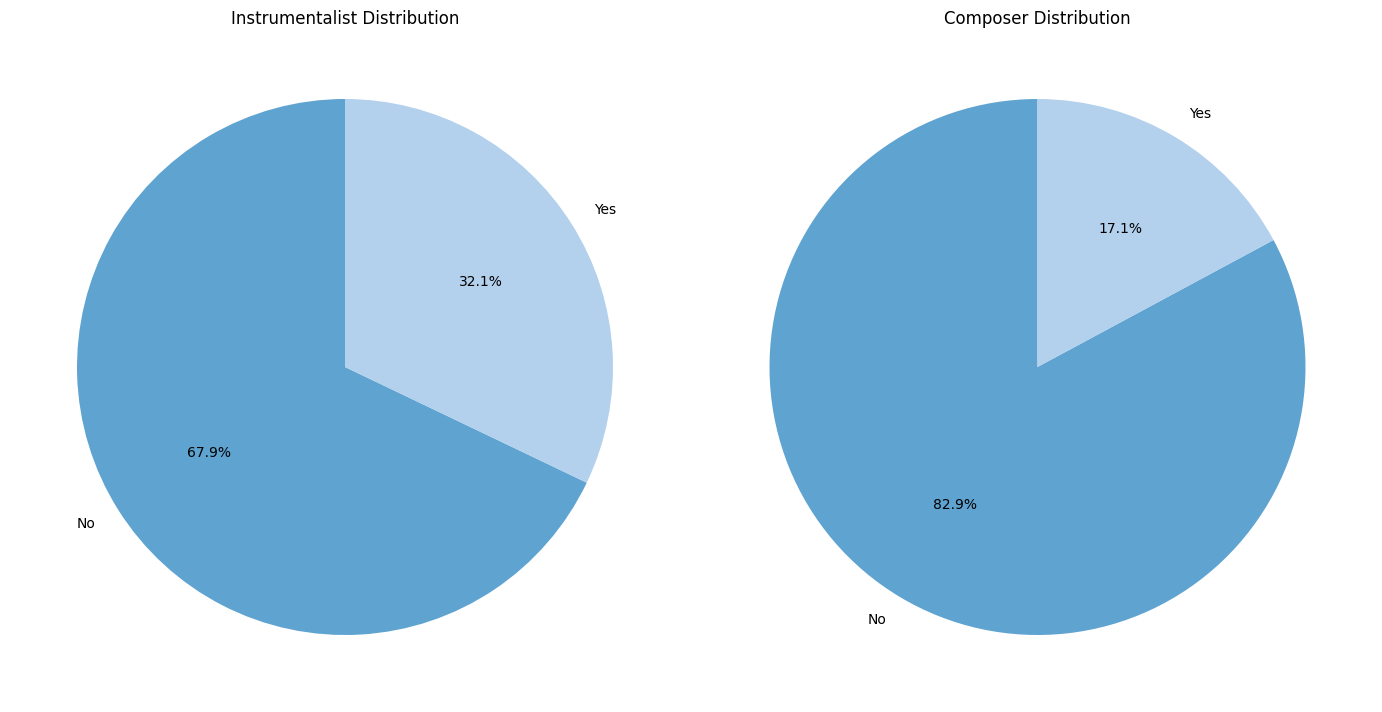

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each category
instrumentalist_counts = dataset['Instrumentalist'].value_counts()
composer_counts = dataset['Composer'].value_counts()

# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot the first pie chart (Instrumentalists)
ax[0].pie(instrumentalist_counts, labels=instrumentalist_counts.index, autopct='%1.1f%%', startangle=90, colors=["#5fa3d1","#b3d0ed"])
ax[0].set_title('Instrumentalist Distribution')

# Plot the second pie chart (Composer)
ax[1].pie(composer_counts, labels=composer_counts.index, autopct='%1.1f%%', startangle=90, colors=["#5fa3d1","#b3d0ed"])
ax[1].set_title('Composer Distribution')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Features: FAV GENRE

In [21]:
dataset['Fav genre'].value_counts(normalize=True)*100

Fav genre
Rock                25.543478
Pop                 15.489130
Metal               11.956522
Classical            7.201087
Video game music     5.978261
EDM                  5.027174
R&B                  4.755435
Hip hop              4.755435
Folk                 4.076087
K pop                3.532609
Country              3.396739
Rap                  2.989130
Jazz                 2.717391
Lofi                 1.358696
Gospel               0.815217
Latin                0.407609
Name: proportion, dtype: float64

### Features: EXPLORATORY and FOREIGN LANGUAGE

In [22]:
dataset.Exploratory.value_counts(normalize=True)*100

Exploratory
Yes    71.331522
No     28.668478
Name: proportion, dtype: float64

In [23]:
dataset['Foreign languages'].value_counts(normalize=True)*100

Foreign languages
Yes    55.191257
No     44.808743
Name: proportion, dtype: float64

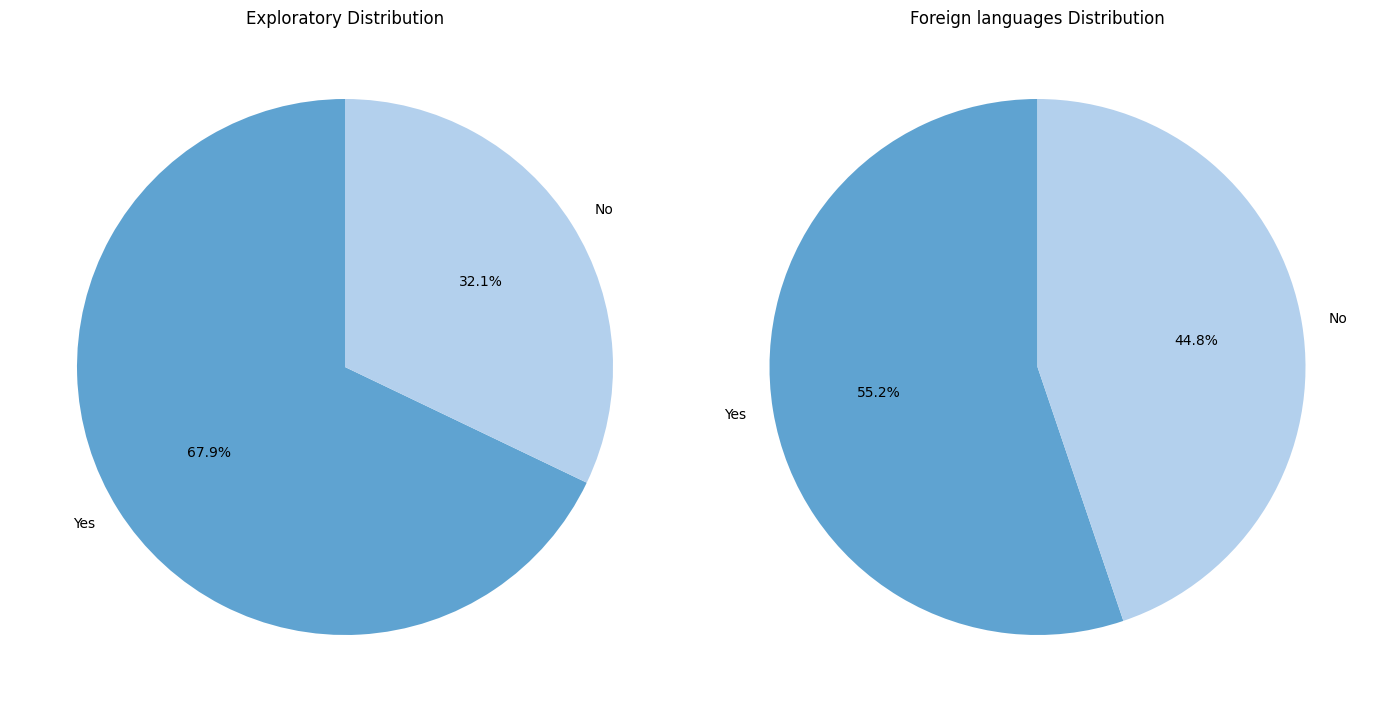

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each category
exploratory_counts = dataset['Exploratory'].value_counts()
foreign_counts = dataset['Foreign languages'].value_counts()

# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot the first pie chart (Exploratory)
ax[0].pie(instrumentalist_counts, labels=exploratory_counts.index, autopct='%1.1f%%', startangle=90, colors=["#5fa3d1","#b3d0ed"])
ax[0].set_title('Exploratory Distribution')

# Plot the second pie chart (Foreign languages)
ax[1].pie(foreign_counts, labels=foreign_counts.index, autopct='%1.1f%%', startangle=90, colors=["#5fa3d1","#b3d0ed"])
ax[1].set_title('Foreign languages Distribution')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Feature: FREQUENCIES of genres

In [25]:
dataset['Frequency [EDM]'].value_counts()

Frequency [EDM]
Never              307
Rarely             194
Sometimes          146
Very frequently     89
Name: count, dtype: int64

In [26]:
freq_options = ['Never','Rarely','Sometimes','Very frequently']

In [27]:
dataset.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [28]:
freq_columns = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]']

In [29]:
freq_df = {
    'Never' : [],
    'Rarely' : [],
    'Sometimes' : [],
    'Very frequently' : []
}

In [30]:
for i in freq_columns:
    value_counts = dataset[i].value_counts()
    freq_df['Never']+=[value_counts['Never']]
    freq_df['Rarely']+=[value_counts['Rarely']]
    freq_df['Sometimes']+=[value_counts['Sometimes']]
    freq_df['Very frequently']+=[value_counts['Very frequently']]

In [31]:
freq_df = pd.DataFrame(freq_df, index=freq_columns)

In [32]:
freq_df

,Never,Rarely,Sometimes,Very frequently
Frequency [Classical],169,259,200,108
Frequency [Country],343,233,111,49
Frequency [EDM],307,194,146,89
Frequency [Folk],292,221,145,78
Frequency [Gospel],535,135,52,14
Frequency [Hip hop],181,214,218,123
Frequency [Jazz],261,247,175,53
Frequency [K pop],416,176,67,77
Frequency [Latin],443,172,88,33
Frequency [Lofi],280,211,160,85


### Features: ANXIETY, DEPRESSION, OCD and INSOMNIA

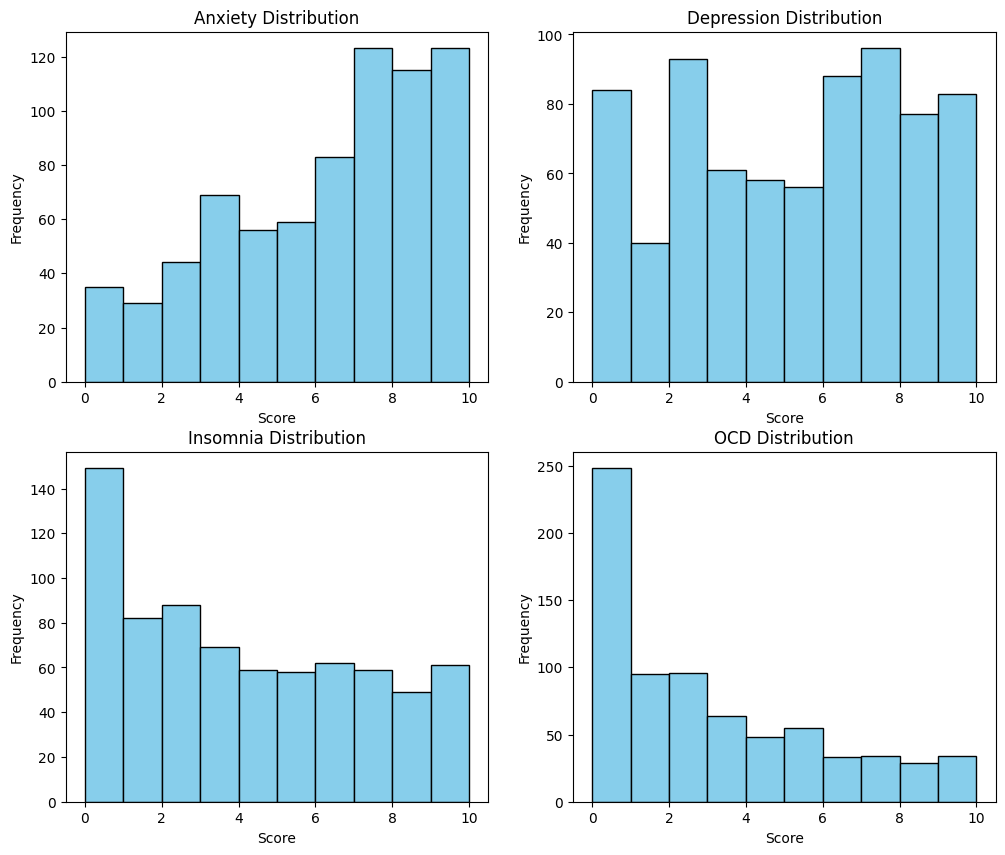

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2,figsize=(12,10))
axes = axes.flatten()

columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Plot each histogram in a separate subplot
for i, column in enumerate(columns):
    axes[i].hist(dataset[column], color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')

# plt.tight_layout()

plt.show()

### Feature: MUSIC EFFECTS

In [34]:
dataset['Music effects'].value_counts()

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

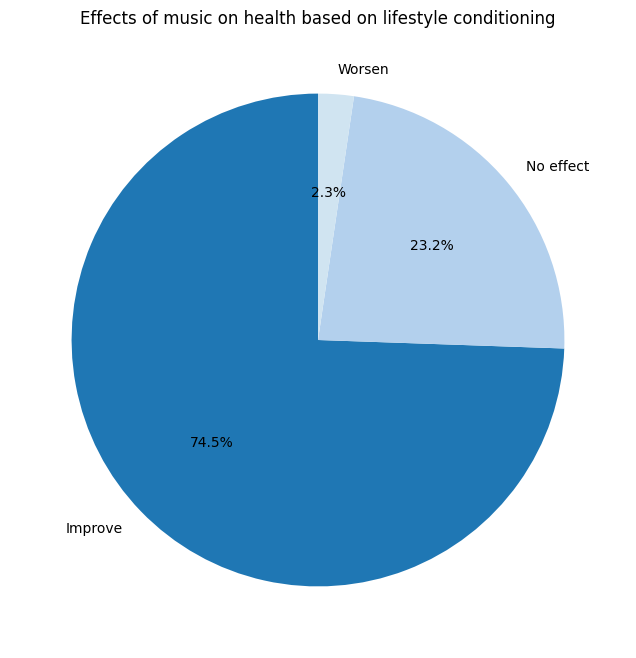

In [35]:
import matplotlib.pyplot as plt


# Define a color palette with shades of blue
base_color = "#1f77b4"  # Base color (blue)
colors = [
    "#1f77b4",  # Base blue
    "#b3d0ed",
    "#d0e4f1"]
# Plot the pie chart
plt.figure(figsize=(8, 8))
dataset['Music effects'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Effects of music on health based on lifestyle conditioning')
plt.ylabel('')  # Hide the ylabel (it's not necessary for a pie chart)
plt.show()

## Correlation Analysis
Identifying how lifestyle factors and music genres correlate with the health condition using heatmaps or pairplots.

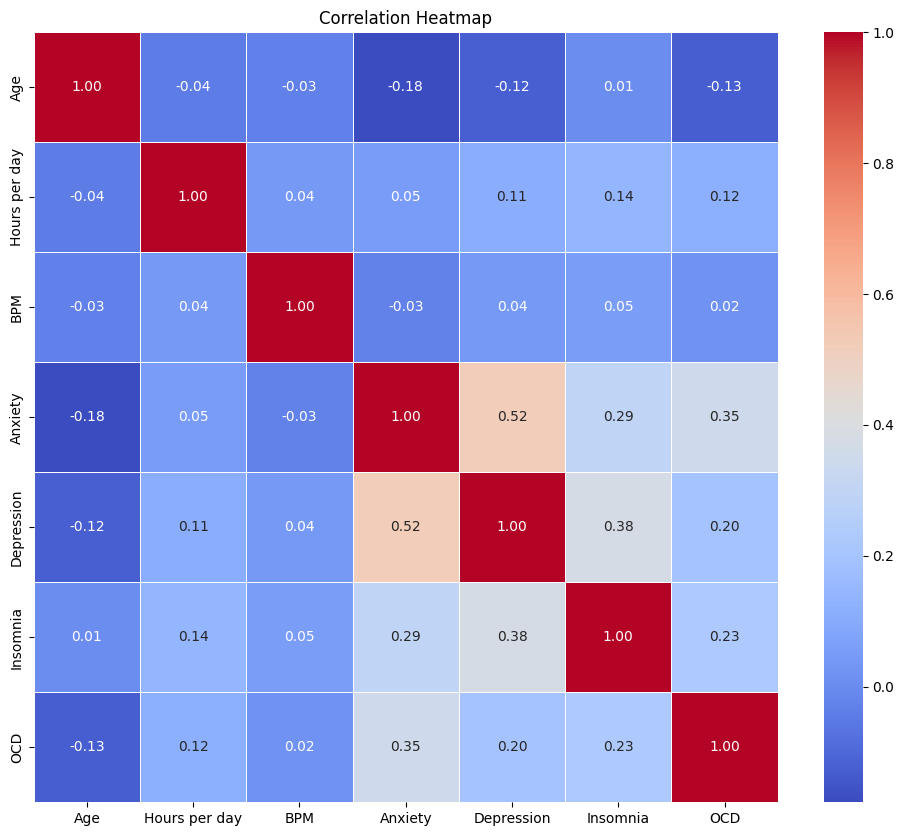

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_features = ['Age', 'Hours per day', 'BPM','Anxiety', 'Depression', 'Insomnia', 'OCD']

# Calculate the correlation matrix
corr_matrix = dataset[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

## Data Cleaning

In [37]:
print('NANs')
dataset.isnull().sum()

NANs


Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

Since we see that the target variable has got 8 missing values, we should remove those entries from the dataset.

In [38]:
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True)

In [39]:
dataset

,index,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
612,732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
613,733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
614,734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [40]:
dataset.isnull().sum()

index                           0
Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression    

In [41]:
dataset.shape

(616, 34)

## Feature Engineering

After using label encoder, we have all categorical features in number format. Then in all, we have all features in number format. what shall we do now to solve a classification problem using this dataset

In [42]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [43]:
# We shall keep the original dataset intact, and work with a clone version of it
dataset1 = dataset.copy()

In [44]:
# Highlighting the Target Column by changing the name of the column to 'Target'
dataset1.rename(columns={'Music effects':'Target'}, inplace=True)

In [45]:
dataset1.BPM

0      132.0
1       84.0
2      107.0
3       86.0
4       66.0
       ...  
611    120.0
612    160.0
613    120.0
614    170.0
615     98.0
Name: BPM, Length: 616, dtype: float64

In [46]:
dataset1.columns

Index(['index', 'Timestamp', 'Age', 'Primary streaming service',
       'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Fav genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Target', 'Permissions'],
      dtype='object')

In [47]:
columns_labelenc = ['Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages',]

In [48]:
columns_ordenc = ['Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

In [49]:
dataset1['Frequency [Classical]'].unique()

array(['Never', 'Sometimes', 'Rarely', 'Very frequently'], dtype=object)

In [50]:
dataset1.Target.unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

In [51]:
labelenc = LabelEncoder()
ordenc = OrdinalEncoder(categories=[['Never', 'Sometimes', 'Rarely', 'Very frequently']]*len(columns_ordenc))
targetenc = OrdinalEncoder(categories=[['Worsen', 'No effect', 'Improve']])

In [52]:
dataset1[columns_labelenc] = dataset1[columns_labelenc].apply(labelenc.fit_transform)

In [53]:
dataset1[columns_ordenc] = pd.DataFrame(ordenc.fit_transform(dataset1[columns_ordenc]),columns=columns_ordenc)

In [54]:
dataset1

,index,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Target,Permissions
0,2,8/27/2022 21:28:18,18.0,4,9,0,0,0,15,0,...,0.0,2.0,2.0,3.0,7.0,7.0,10.0,2.0,No effect,I understand.
1,3,8/27/2022 21:40:40,61.0,5,7,1,0,1,6,1,...,1.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve,I understand.
2,4,8/27/2022 21:54:47,18.0,4,9,1,0,0,12,1,...,3.0,3.0,0.0,2.0,7.0,2.0,5.0,9.0,Improve,I understand.
3,5,8/27/2022 21:56:50,18.0,4,10,1,1,1,6,1,...,3.0,3.0,3.0,0.0,8.0,8.0,7.0,7.0,Improve,I understand.
4,6,8/27/2022 22:00:29,18.0,5,8,1,1,0,15,1,...,2.0,0.0,0.0,1.0,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,731,10/30/2022 14:37:28,17.0,4,6,1,1,0,14,1,...,0.0,2.0,3.0,0.0,7.0,6.0,0.0,9.0,Improve,I understand.
612,732,11/1/2022 22:26:42,18.0,4,4,1,1,0,11,1,...,0.0,0.0,1.0,1.0,3.0,2.0,2.0,5.0,Improve,I understand.
613,733,11/3/2022 23:24:38,19.0,2,11,1,0,1,13,1,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,Improve,I understand.
614,734,11/4/2022 17:31:47,19.0,4,10,1,1,0,0,0,...,0.0,0.0,0.0,1.0,2.0,3.0,2.0,1.0,Improve,I understand.


In [55]:
dataset1['Target'] = pd.DataFrame(targetenc.fit_transform(dataset1['Target'].values.reshape(-1,1)),columns=['Target'])

In [56]:
dataset1

,index,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Target,Permissions
0,2,8/27/2022 21:28:18,18.0,4,9,0,0,0,15,0,...,0.0,2.0,2.0,3.0,7.0,7.0,10.0,2.0,1.0,I understand.
1,3,8/27/2022 21:40:40,61.0,5,7,1,0,1,6,1,...,1.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,2.0,I understand.
2,4,8/27/2022 21:54:47,18.0,4,9,1,0,0,12,1,...,3.0,3.0,0.0,2.0,7.0,2.0,5.0,9.0,2.0,I understand.
3,5,8/27/2022 21:56:50,18.0,4,10,1,1,1,6,1,...,3.0,3.0,3.0,0.0,8.0,8.0,7.0,7.0,2.0,I understand.
4,6,8/27/2022 22:00:29,18.0,5,8,1,1,0,15,1,...,2.0,0.0,0.0,1.0,4.0,8.0,6.0,0.0,2.0,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,731,10/30/2022 14:37:28,17.0,4,6,1,1,0,14,1,...,0.0,2.0,3.0,0.0,7.0,6.0,0.0,9.0,2.0,I understand.
612,732,11/1/2022 22:26:42,18.0,4,4,1,1,0,11,1,...,0.0,0.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,I understand.
613,733,11/3/2022 23:24:38,19.0,2,11,1,0,1,13,1,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,I understand.
614,734,11/4/2022 17:31:47,19.0,4,10,1,1,0,0,0,...,0.0,0.0,0.0,1.0,2.0,3.0,2.0,1.0,2.0,I understand.


In [57]:
dataset1.Target.value_counts()

Target
2.0    465
1.0    136
0.0     15
Name: count, dtype: int64

In [58]:
dataset['Music effects'].value_counts()

Music effects
Improve      465
No effect    136
Worsen        15
Name: count, dtype: int64

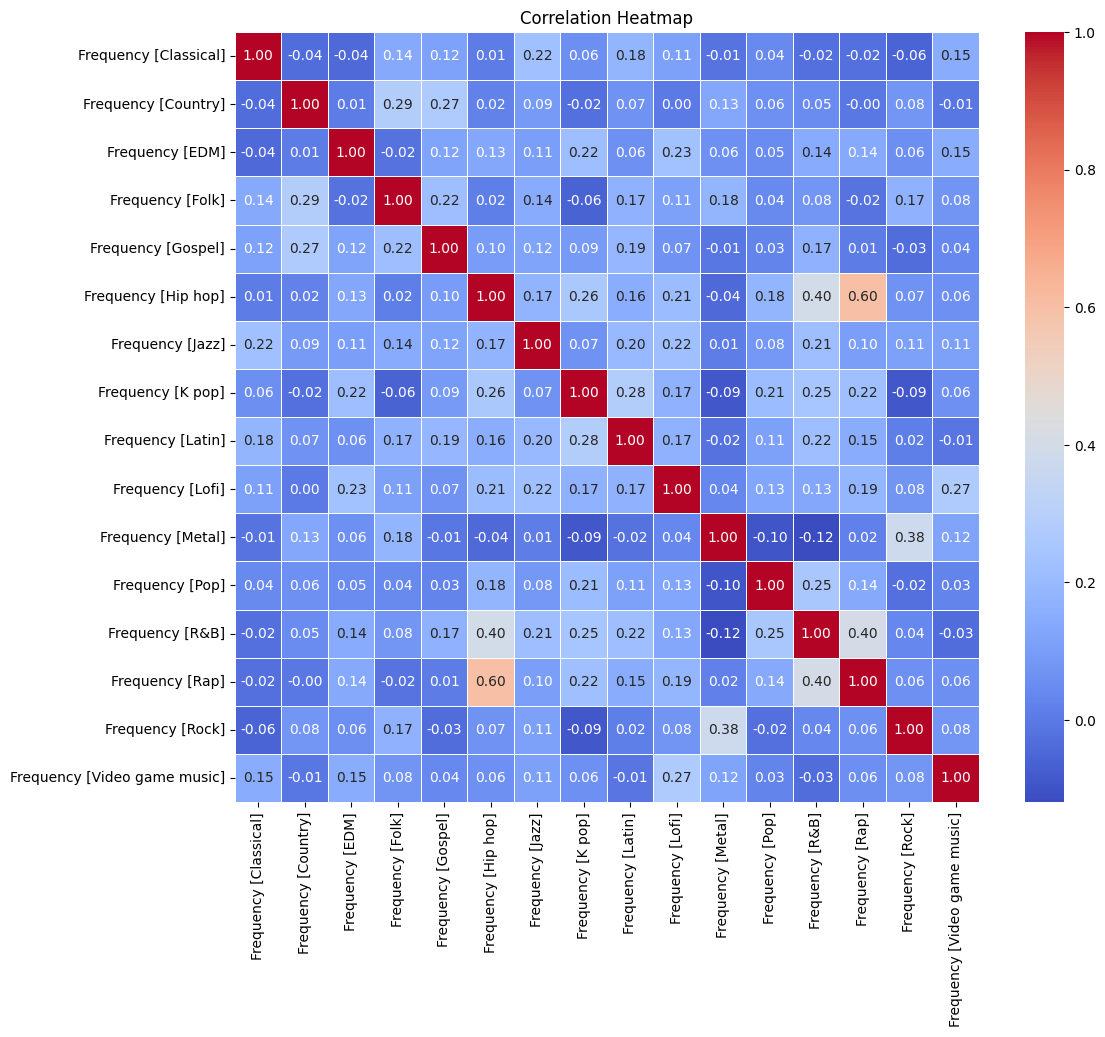

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_features = columns_ordenc

# Calculate the correlation matrix
corr_matrix = dataset1[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection

In [60]:
dataset1.drop(columns=['Permissions','index','Timestamp'], inplace=True)

In [61]:
dataset1

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Target
0,18.0,4,9,0,0,0,15,0,1,132.0,...,2.0,0.0,2.0,2.0,3.0,7.0,7.0,10.0,2.0,1.0
1,61.0,5,7,1,0,1,6,1,1,84.0,...,1.0,1.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,2.0
2,18.0,4,9,1,0,0,12,1,0,107.0,...,1.0,3.0,3.0,0.0,2.0,7.0,2.0,5.0,9.0,2.0
3,18.0,4,10,1,1,1,6,1,1,86.0,...,3.0,3.0,3.0,3.0,0.0,8.0,8.0,7.0,7.0,2.0
4,18.0,5,8,1,1,0,15,1,1,66.0,...,2.0,2.0,0.0,0.0,1.0,4.0,8.0,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,17.0,4,6,1,1,0,14,1,1,120.0,...,3.0,0.0,2.0,3.0,0.0,7.0,6.0,0.0,9.0,2.0
612,18.0,4,4,1,1,0,11,1,1,160.0,...,3.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0
613,19.0,2,11,1,0,1,13,1,0,120.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
614,19.0,4,10,1,1,0,0,0,0,170.0,...,0.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,1.0,2.0


## Feature Scaling

In [62]:
(dataset1.BPM==999999999).sum()

1

In [63]:
dataset1[dataset1['BPM'] == 999999999].index

Index([471], dtype='int64')

In [64]:
dataset1.drop(index=[471], inplace=True)
dataset.reset_index(inplace=True)

In [65]:
cols = dataset1.columns
minMax = {
    'min' : [],
    'max' : []
}

for col in cols:
    minMax['min']+=[dataset1[col].min()]
    minMax['max']+=[dataset1[col].max()]

minMax = pd.DataFrame(minMax, index=cols)

In [66]:
minMax

,min,max
Age,10.0,89.0
Primary streaming service,0.0,5.0
Hours per day,0.0,22.0
While working,0.0,1.0
Instrumentalist,0.0,1.0
Composer,0.0,1.0
Fav genre,0.0,15.0
Exploratory,0.0,1.0
Foreign languages,0.0,1.0
BPM,0.0,624.0


In [67]:
cols = list(dataset1.columns)
cols.remove('Target')

In [68]:
dataset1.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Target'],
      dtype='object')

In [69]:
dataset1

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Target
0,18.0,4,9,0,0,0,15,0,1,132.0,...,2.0,0.0,2.0,2.0,3.0,7.0,7.0,10.0,2.0,1.0
1,61.0,5,7,1,0,1,6,1,1,84.0,...,1.0,1.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,2.0
2,18.0,4,9,1,0,0,12,1,0,107.0,...,1.0,3.0,3.0,0.0,2.0,7.0,2.0,5.0,9.0,2.0
3,18.0,4,10,1,1,1,6,1,1,86.0,...,3.0,3.0,3.0,3.0,0.0,8.0,8.0,7.0,7.0,2.0
4,18.0,5,8,1,1,0,15,1,1,66.0,...,2.0,2.0,0.0,0.0,1.0,4.0,8.0,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,17.0,4,6,1,1,0,14,1,1,120.0,...,3.0,0.0,2.0,3.0,0.0,7.0,6.0,0.0,9.0,2.0
612,18.0,4,4,1,1,0,11,1,1,160.0,...,3.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0
613,19.0,2,11,1,0,1,13,1,0,120.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
614,19.0,4,10,1,1,0,0,0,0,170.0,...,0.0,0.0,0.0,0.0,1.0,2.0,3.0,2.0,1.0,2.0


In [70]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale
columns_to_scale = cols

# Apply MinMaxScaler to selected columns
dataset1[columns_to_scale] = scaler.fit_transform(dataset1[columns_to_scale])

In [71]:
dataset1

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Target
0,0.101266,0.8,0.409091,0.0,0.0,0.0,1.000000,0.0,1.0,0.211538,...,0.666667,0.000000,0.666667,0.666667,1.000000,0.7,0.7,1.0,0.2,1.0
1,0.645570,1.0,0.318182,1.0,0.0,1.0,0.400000,1.0,1.0,0.134615,...,0.333333,0.333333,0.000000,0.000000,0.000000,0.9,0.7,0.3,0.3,2.0
2,0.101266,0.8,0.409091,1.0,0.0,0.0,0.800000,1.0,0.0,0.171474,...,0.333333,1.000000,1.000000,0.000000,0.666667,0.7,0.2,0.5,0.9,2.0
3,0.101266,0.8,0.454545,1.0,1.0,1.0,0.400000,1.0,1.0,0.137821,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.8,0.8,0.7,0.7,2.0
4,0.101266,1.0,0.363636,1.0,1.0,0.0,1.000000,1.0,1.0,0.105769,...,0.666667,0.666667,0.000000,0.000000,0.333333,0.4,0.8,0.6,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.088608,0.8,0.272727,1.0,1.0,0.0,0.933333,1.0,1.0,0.192308,...,1.000000,0.000000,0.666667,1.000000,0.000000,0.7,0.6,0.0,0.9,2.0
612,0.101266,0.8,0.181818,1.0,1.0,0.0,0.733333,1.0,1.0,0.256410,...,1.000000,0.000000,0.000000,0.333333,0.333333,0.3,0.2,0.2,0.5,2.0
613,0.113924,0.4,0.500000,1.0,0.0,1.0,0.866667,1.0,0.0,0.192308,...,0.333333,0.333333,0.333333,0.666667,0.666667,0.2,0.2,0.2,0.2,2.0
614,0.113924,0.8,0.454545,1.0,1.0,0.0,0.000000,0.0,0.0,0.272436,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.2,0.3,0.2,0.1,2.0


# Model Training and Selection

In [72]:
dataset1.Target.value_counts()

Target
2.0    465
1.0    135
0.0     15
Name: count, dtype: int64

## Train-Test split
Divide the data into training and test sets, typically using an 80/20 or 70/30 split, ensuring that the data is stratified (if using binary classification) so that both healthy and unhealthy classes are represented proportionally in both sets.

In [73]:
from sklearn.model_selection import train_test_split

X = dataset1.drop(columns=['Target'])
y = dataset1['Target']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,  # For 80/20 split (use 0.3 for 70/30 split)
    stratify=y,     # Ensure stratification of the target labels
    random_state=42  # Set a random seed for reproducibility
)

In [75]:
print("Class distribution in original dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Class distribution in original dataset:
Target
2.0    0.756098
1.0    0.219512
0.0    0.024390
Name: proportion, dtype: float64

Class distribution in training set:
Target
2.0    0.755814
1.0    0.218605
0.0    0.025581
Name: proportion, dtype: float64

Class distribution in test set:
Target
2.0    0.756757
1.0    0.221622
0.0    0.021622
Name: proportion, dtype: float64


Use Cross-validation and Hyperparameter Tuning for each model being trained

## Choosing Models
Baseline Model : Logistic Regression
Other models that are planned to be trained : RandomForest, Gradient Boosting Machines, XGBoost, LightGBM, Support Vector Machines (SVM)<br><br>
Make sure to balance out the classes while training the model using the parameter class_weight = 'balanced'

### Logistic Regression

#### With Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Type of regularization
    'solver': ['liblinear', 'lbfgs'],  # Solver to use
    'l1_ratio': [0.0, 0.5, 1.0] # only for elasticnet solver
}

# Instantiate the model
logreg = LogisticRegression(class_weight='balanced',random_state=42)

# Instantiate RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
rand_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'l1_ratio': [0.0, 0.5, 1.0],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'lbfgs']},
                   scoring='accuracy')

In [77]:
# Use the best model to make predictions
y_pred = rand_search.best_estimator_.predict(X_test)

# Get the best hyperparameters
print("Best hyperparameters found:", rand_search.best_params_)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(f"Accuracy of tuned model: {accuracy_score(y_test, y_pred):.4f}")

Best hyperparameters found: {'solver': 'liblinear', 'penalty': 'l2', 'l1_ratio': 0.0, 'C': 0.01}
Accuracy of tuned model: 0.7568


In [78]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00        41
         2.0       0.76      1.00      0.86       140

    accuracy                           0.76       185
   macro avg       0.25      0.33      0.29       185
weighted avg       0.57      0.76      0.65       185



Text(0.5, 1.0, 'Confusion Matrix')

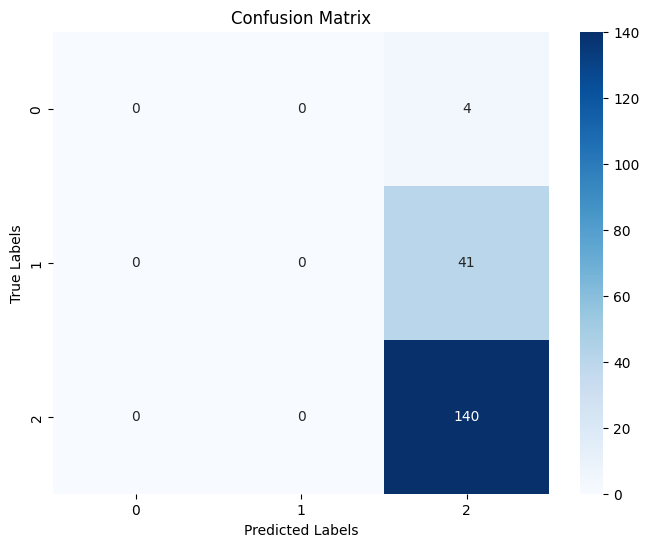

In [79]:
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

#### Without Hyperparameter tuning

In [80]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy (using training set): {accuracy:.4f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (using test set): {accuracy:.4f}")

Accuracy (using training set): 0.7581
Accuracy (using test set): 0.7784


In [82]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.67      0.15      0.24        41
         2.0       0.78      0.99      0.87       140

    accuracy                           0.78       185
   macro avg       0.48      0.38      0.37       185
weighted avg       0.74      0.78      0.71       185



Text(0.5, 1.0, 'Confusion Matrix')

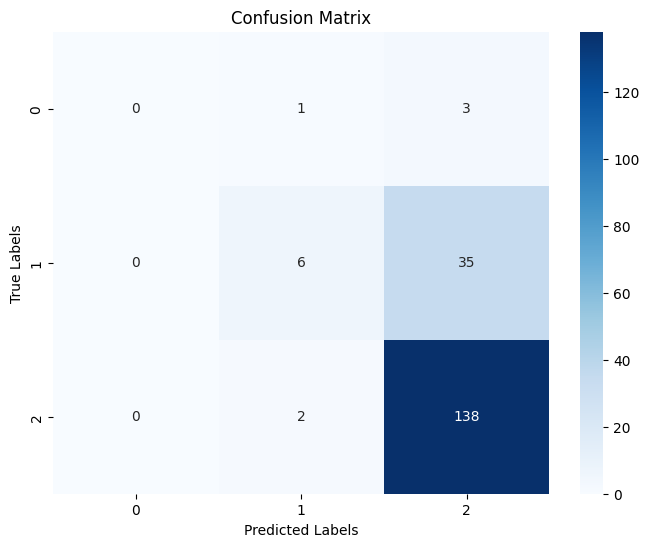

In [83]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

### RandomForestClassifier

#### With Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the model
rf = RandomForestClassifier(class_weight='balanced',random_state=42)

# Instantiate RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [85]:
# Use the best model to make predictions
y_pred = rand_search.best_estimator_.predict(X_test)

# Get the best hyperparameters
print("Best hyperparameters found:", rand_search.best_params_)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(f"Accuracy of tuned model: {accuracy_score(y_test, y_pred):.4f}")

Best hyperparameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Accuracy of tuned model: 0.7568


Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00        41
         2.0       0.76      1.00      0.86       140

    accuracy                           0.76       185
   macro avg       0.25      0.33      0.29       185
weighted avg       0.57      0.76      0.65       185



Text(0.5, 1.0, 'Confusion Matrix')

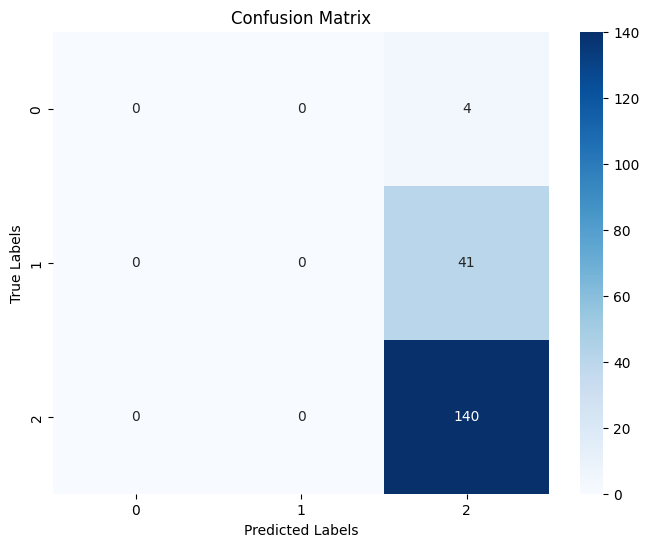

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

#### Without hyperparameter tuning

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
# Use the best model to make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(f"Accuracy of model: {accuracy_score(y_test, y_pred):.4f}")

Accuracy of model: 0.7514


Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.33      0.02      0.05        41
         2.0       0.76      0.99      0.86       140

    accuracy                           0.75       185
   macro avg       0.36      0.34      0.30       185
weighted avg       0.65      0.75      0.66       185



Text(0.5, 1.0, 'Confusion Matrix')

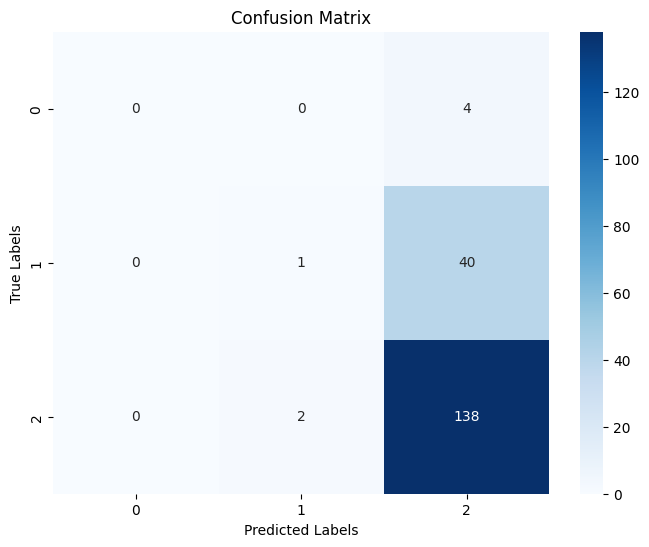

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

### Support Vector Machines

#### With hyperparameter tuning

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # SVM kernel types
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly'
    'degree': [3, 4, 5],  # Degree of the polynomial kernel function (relevant for 'poly' kernel)
    'tol': [1e-4, 1e-3],  # Tolerance for stopping criterion
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=auto, kernel=rbf, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, 

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'tol': [0.0001, 0.001]},
             verbose=2)

In [91]:
# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Step 5: Evaluate the model using the best estimator from GridSearchCV
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Best parameters: {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'tol': 0.0001}
Accuracy: 0.7567567567567568
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00        41
         2.0       0.76      1.00      0.86       140

    accuracy                           0.76       185
   macro avg       0.25      0.33      0.29       185
weighted avg       0.57      0.76      0.65       185



### GBMs

# Model Evaluation

## Performance Metrics

## Confusion Matrix

## Precision Recall Curve

# Final Model Deployment
Use Voting method to boost the accuracy score

# Communication of Results

## Report

## Important feature graphs